<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/ML%2CDL/17)%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***7-3 신경망 모델 훈련***

# **줄거리**

#Note

#**코드**


In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target), (test_input,test_target) =\
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100,activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

In [ ]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled, train_target,epochs=5,verbose=0)    #케라스의 fit() 은 History 클래스 객체를 반환한다

In [ ]:
print(history.history.keys())    #epoch 마다 loss, accuracy 보여주는 리스트

dict_keys(['loss', 'accuracy'])


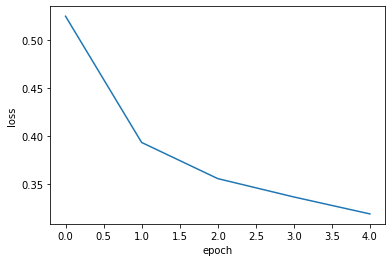

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

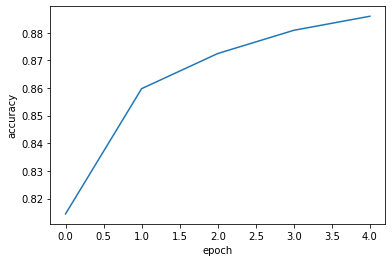

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

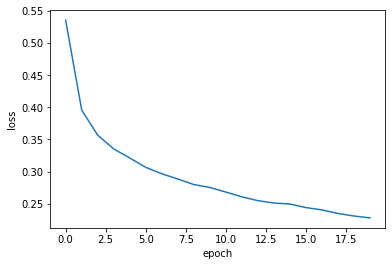

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# 모델을 검증할 때 정확도보다 손실을 확인하는 것이 더 낫다

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=0,
                    validation_data=(val_scaled,val_target))

In [ ]:
history.history.keys()    #검증세트에 대한 손실 추가됨

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

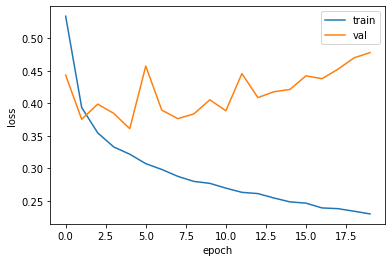

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()    #epoch가 늘어날수록 train 은 과대적합되어간다

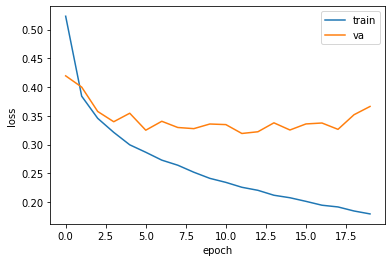

In [ ]:
model = model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','va'])
plt.show()

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))    # 훈련이 끝난 후에는 알아서 Dropout 적용 안하니 걱정 안해도 된다.
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


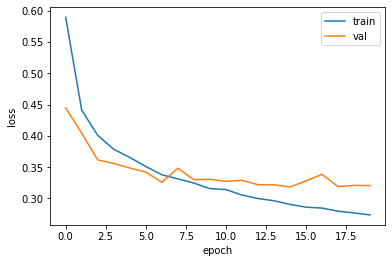

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs= 20, verbose=0, validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()    #epochs = 10 정도가 적당해보인다

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=10,verbose=0,validation_data=(val_scaled,val_target))

In [ ]:
model.save_weights('model-wights.h5')    #훈련한 모델의 파라미터 저장

In [ ]:
model.save('model-whole.h5')    #모델 구조, 모델 파라미터 함께 저장

In [ ]:
!ls -al *

-rw-r--r-- 1 root root 981736 Jun 12 10:31 model-whole.h5
-rw-r--r-- 1 root root 332480 Jun 12 10:30 model-wights.h5

sample_data:
total 55512
drwxr-xr-x 1 root root     4096 Jun  1 13:40 .
drwxr-xr-x 1 root root     4096 Jun 12 10:31 ..
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Jun  1 13:40 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Jun  1 13:40 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Jun  1 13:40 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Jun  1 13:40 mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md


In [ ]:
model_test = model_fn(keras.layers.Dropout(0.3))    # 파라미터만 이용
model_test.load_weights('model-wights.h5')    #save_weights <-> load_weights
#당연하지만 저장한 파라미터를 불러와서 쓰려면 모델 구조가 완전히 동일해야한다

In [ ]:
import numpy as np
val_labels = np.argmax(model_test.predict(val_scaled),axis=-1)    # predict 값 중 가장 큰 값을 고르기위해서 argmax() 사용 (배열에서 가장 큰 값의 *인덱스*를 반환)
#axis = -1 -> 마지막 차원 n (axis=0,1,2,...,n)
print(np.mean(val_labels==val_target))

0.88225


In [ ]:
model_test2 = keras.models.load_model('model-whole.h5')    # 모델, 파라미터 이용
model_test2.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3304 - accuracy: 0.8823


[0.330403596162796, 0.8822500109672546]

*콜백 : 훈련 과정 중간 어떤 작업을 수행할 수 있게 해주는 객체

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')    # 가장 높은 검증 점수의 모델 자동 저장
model.fit(train_scaled,train_target,epochs=20,verbose=0,
          validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb])

In [ ]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3356 - accuracy: 0.8817


[0.3356347978115082, 0.8817499876022339]

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2,    #조기종료 추가 -> 에포크 횟수 늘려도 안심
                                                  restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])    # 콜백 리스트에 추가되었다

In [ ]:
early_stopping_cb.stopped_epoch    # 0부터 시작하고, patient = 2 였으므로 최상의 epoch = 11

12

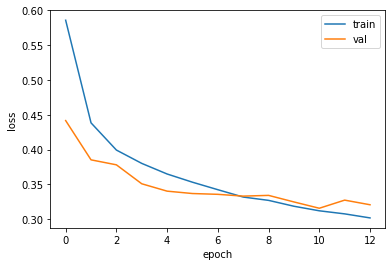

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3159 - accuracy: 0.8832


[0.3159058690071106, 0.8832499980926514]